In [50]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [51]:
px = 5
py = 10
#c = 6
c = px*py
t = 30
Ly = 1
Lx = 10
N = (px - 2)*(py - 2)
M_4x = px 
M_4y = py - 2
M = 2* M_4x + 2* M_4y
a=2
b=1
M

26

In [52]:
def euclidian_distance(x,y,xyk,c):
    matrix = np.zeros([len(x)*len(y) ,c])
    number_matrix = np.zeros([len(x)*len(y),2])
    for i in range(0,len(x)):
        for j in range(0,len(y)):
            n = i
            m = j + i*len(y)
            matrix[m,:] = np.sqrt(np.square(x[n]- xyk[:,0])  + np.square(y[j] - xyk[:,1])) + (2.2250738585072014e-308)**(1/(2*a))
            number_matrix[m,0] = x[n]
            number_matrix[m,1] = y[j]
    return matrix, number_matrix

def points(x,y):
    matrix = np.zeros([len(x)*len(y),2])
    boundary = np.zeros([4*len(y)-4,2])
    interior = np.zeros([(len(x) - 2) * (len(y)-2),2])
    h, u = 0,0
    for i in range(0,len(x)):
        for j in range(0,len(y)):
            n = i#%len(x)
            m = j + i*len(y)
            matrix[m,0] = x[n]
            matrix[m,1] = y[j]
        
            if n == 0 or n == len(x)-1 or j == 0 or j == len(y)-1:
                
                boundary[h,0] = x[n]
                boundary[h,1] = y[j]
                h+=1
            else:
                interior[u,0] = x[n]
            
                interior[u,1] = y[j]
                u+=1
    return matrix, boundary, interior

In [53]:
x = np.linspace(0,Lx,px)
y = np.linspace(0,Ly,py)

X,Y = np.meshgrid(x,y)

#Puntos internos

x_int = x[1:-1]
y_int = y[1:-1]
Xin,Yin = np.meshgrid(x_int,y_int)

#Puntos en las fronteras:
xf1, yf1 = (x, np.zeros(1)) # f(x,0) 
X1,Y1 = np.meshgrid(xf1 , yf1)
xf2,yf2 = (x, np.ones(1)*Ly) # f(x,L)
X2,Y2 = np.meshgrid(xf2 , yf2)
xf3,yf3 = (np.zeros(1), y_int ) #f(0,y)
X3,Y3 = np.meshgrid(xf3 , yf3)
xf4,yf4 = (np.ones(1)*Lx,y_int) #f(L,y)
X4,Y4 = np.meshgrid(xf4,yf4)

#Centros
x_c = np.linspace(0,Lx,px)
y_c = np.linspace(0,Ly,py)

xk = points(x_c,y_c)[0][:,0].reshape(-1,1)
yk = points(x_c,y_c)[0][:,1].reshape(-1,1)
#c = len(x_int)
xyk1 = np.concatenate((xk,yk),axis = 1)

#Puntos test
x_test = np.linspace(0,Lx,t)
y_test = np.linspace(0,Ly,t)
Xt,Yt = np.meshgrid(x_test,y_test)
x_vector = points(x,y)[0][:,0].reshape(-1,1)
y_vector = points(x,y)[0][:,1].reshape(-1,1)
x_vector.shape
x_v2 = euclidian_distance(x,y,xyk1,c)[1][:,0].reshape(-1,1)
x_v2.shape

(50, 1)

In [54]:
def tps_rbf(euclidian_distance,a=a,b=b):
    #if euclidian_distance == 0:
    #    return 0
    #else:
    return (euclidian_distance*b)**(2*a) *np.log(b*euclidian_distance) #euclidian_distance + 1e-10 to avoid singularity at zero
def tpsdx(x_vector,euclidian_distance,a=a,b=b):
        return (x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))/euclidian_distance * (b)**(2*a) *2*a*euclidian_distance**(2*a-1)*(np.log(b*euclidian_distance) + 1)# #euclidian_distance + 1e-10 to avoid singularity at zero  
    
def tpsdy(y_vector,euclidian_distance,a=a,b=b):
        return (b)**(2*a) *(2*a*euclidian_distance**(2*a-1)*np.log(b*euclidian_distance) + b*euclidian_distance**(2*a) /(b*euclidian_distance)) * (y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1)) #euclidian_distance + 1e-10 to avoid singularity at zero
def tpsdxx(x_vector,euclidian_distance,a=a,b=b):
        return ((euclidian_distance**2 - (x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))**2)/euclidian_distance**3 * (b)**(2*a) *2*a*euclidian_distance**(2*a-1)*(np.log(b*euclidian_distance) + 1)
                        + ((x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))/euclidian_distance) **2 * b**(2*a) *euclidian_distance**(2*a-2) *((2*a-1)* (2*a*np.log(b*euclidian_distance) ) +2*a))
def tpsdyy(y_vector,euclidian_distance,a=a,b=b):
        return ((euclidian_distance**2 - (y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1))**2)/euclidian_distance**3 * (b)**(2*a) *2*a*euclidian_distance**(2*a-1)*(np.log(b*euclidian_distance) + 1)
                        + ((y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1))/euclidian_distance) **2 * b**(2*a) *euclidian_distance**(2*a-2) *((2*a-1)* (2*a*np.log(b*euclidian_distance) ) +2*a))

In [55]:
euclidian_dist_complete = euclidian_distance(x,y,xyk1,c)[0]
euclidian_dist_int = euclidian_distance(x_int,y_int,xyk1,c)[0]

euclidian_dist_border1 = euclidian_distance(xf1,yf1,xyk1,c)[0]
euclidian_dist_border2 = euclidian_distance(xf2,yf2,xyk1,c)[0]
euclidian_dist_border3 = euclidian_distance(xf3,yf3,xyk1,c)[0]
euclidian_dist_border4 = euclidian_distance(xf4,yf4,xyk1,c)[0]

In [56]:
x_vector_int = euclidian_distance(x_int,y_int,xyk1,c)[1][:,0]
y_vector_int = euclidian_distance(x_int,y_int,xyk1,c)[1][:,1]
euclidian_dist_border3.shape

(8, 50)

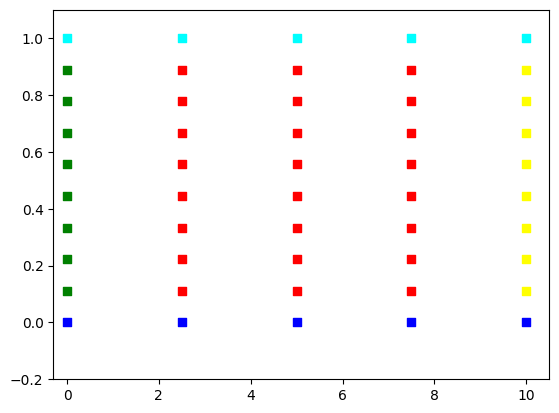

In [57]:
#Plot the colocation points
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([-0.3,Lx*1.05])
ax.set_ylim([-0.2,Ly*1.1])
ax.scatter(Xin,Yin,marker='s', color='red')
ax.scatter(X1,Y1,marker='s', color = 'blue')

ax.scatter(X2,Y2,marker='s', color = 'cyan')
ax.scatter(X3,Y3,marker='s', color = 'green')
ax.scatter(X4,Y4,marker = 's' ,color = 'yellow')
#ax.scatter(XC,YC, color = 'black')
plt.show()

In [61]:
gxx_int = (tpsdxx(x_vector_int,euclidian_dist_int)) 
gyy_int =  (tpsdyy(y_vector_int,euclidian_dist_int)) 
gx_int = (tpsdx(x_vector_int,euclidian_dist_int)) 
gy_int = tpsdy(y_vector_int,euclidian_dist_int)
g_int = tps_rbf(euclidian_dist_int)
gx_b4 = tpsdx(np.ones_like(y_int)*Lx,euclidian_dist_border4 )
gy_b4 = tpsdy(y_int,euclidian_dist_border4)
gxx_b4 = tpsdxx(np.ones_like(y_int)*Lx,euclidian_dist_border4)
gyy_b4 = tpsdyy(y_int,euclidian_dist_border4)
gb2 = tps_rbf(euclidian_dist_border2)
gb3 = tps_rbf(euclidian_dist_border3)
gxx_b3 = tpsdxx(np.zeros_like(y_int),euclidian_dist_border3)
gyy_b3 = tpsdyy(y_int,euclidian_dist_border3)
gx_b3 = tpsdx(np.zeros_like(y_int),euclidian_dist_border3)
gy_b3 = tpsdy(y_int,euclidian_dist_border3)

gb1 = tps_rbf(euclidian_dist_border1)
gb4 = tps_rbf(euclidian_dist_border4)

gxx_b2 = tpsdxx(x,euclidian_dist_border2)
gxx_b1 = tpsdxx(x,euclidian_dist_border1)
gyy_b2 = tpsdyy(np.ones_like(x)*Ly,euclidian_dist_border2)
gyy_b1 = tpsdyy(np.zeros_like(x),euclidian_dist_border1)

gy_b2 = tpsdy(np.ones_like(x)*Ly,euclidian_dist_border2)
gy_b1 = tpsdy(np.zeros_like(x),euclidian_dist_border1)

In [62]:
phidphidx = np.array([ g_int[:,i] * gx_int[:,j] for i in range(g_int.shape[1]) for j in range(gx_int.shape[1])]  ).T
phidphidy = np.array([g_int[:,i] * gy_int[:,j] for i in range(g_int.shape[1]) for j in range(gy_int.shape[1])] ).T

phidphidx_b3 = np.array([ gb3[:,i] * gx_b3[:,j] for i in range(gxx_b3.shape[1]) for j in range(gx_b3.shape[1])]  ).T
phidphidx_b4 = np.array([ gb4[:,i] * gx_b4[:,j] for i in range(gxx_b4.shape[1]) for j in range(gx_b4.shape[1])]  ).T
phidphidy_b3 = np.array([ gb3[:,i] * gy_b3[:,j] for i in range(gxx_b3.shape[1]) for j in range(gy_b3.shape[1])]  ).T
phidphidy_b4 = np.array([ gb4[:,i] * gy_b4[:,j] for i in range(gxx_b4.shape[1]) for j in range(gy_b4.shape[1])]  ).T

#phidphidy_b4.shape


In [63]:
weights = np.random.rand(3*px*py,1)
wx = weights[:N+M].reshape(-1,1)
wy = weights[N+M:2*(N+M)].reshape(-1,1)
wp = weights[2*(N+M):3*(N+M)].reshape(-1,1)

In [67]:

def NavierStokess(weights):
        
    wx = weights[:N+M].reshape(-1,1)
    wy = weights[N+M:2*(N+M)].reshape(-1,1)
    wp = weights[2*(N+M):3*(N+M)].reshape(-1,1)
    wxiwxj = np.array([ wx[i]*wx[j] for i in range(len(wx)) for j in range(len(wy))])
    wyiwyj = np.array([ wy[i]*wy[j] for i in range(len(wx)) for j in range(len(wy))])
    wxiwyj = np.array([ wx[i]*wy[j] for i in range(len(wx)) for j in range(len(wy))])
    wyiwxj = np.array([ wy[i]*wx[j] for i in range(len(wx)) for j in range(len(wy))])
    #weights = np.concatenate((wx,wxiwxj,wyiwxj,wy,wxiwyj,wyiwyj),axis = 0)
    
    
    F = np.zeros(((3*N+ 6*(M_4x) + 6*(M_4y)),))
    #Ecuaiones diferenciales en puntos internos
        #Ecuacion en x
    F[0:N] +=  ( -np.dot(gxx_int,wx) - np.dot(gyy_int,wx) + np.dot(gx_int,wp) + np.dot(phidphidx,wxiwxj) + np.dot(phidphidy,wyiwxj)).flatten()
        #   Ecuacione en y
    F[N:2*N] += (-np.dot(gxx_int,wy) - np.dot(gyy_int,wy) + np.dot(gy_int,wp) + np.dot(phidphidx,wxiwyj) + np.dot(phidphidy,wyiwyj)).flatten() 
        #Ecuacion de continuidad
    F[2*N:3*N] += (np.dot(gx_int,wx) + np.dot(gy_int,wy)).flatten()
    
    #Condiciones de frontera
    
        # Condiciones de ux
    F[3*N  : 3*N +  M_4x] = ( np.dot( gb2 , wx ) ).flatten()
    F[3*N + ( M_4x): 3*N + 2 * ( M_4x)] = (np.dot(gb1,wx)).flatten()
    F[3*N + 2 * ( M_4x ):3*N + 2 * ( M_4x ) + (M_4y)] = (np.dot(gb3,wx) - 1.0).flatten()
    
    
        #Condiciones de uy
    F[3*N + 2 * ( M_4x) + M_4y : 3*N + 3 * ( M_4x ) + M_4y] = (np.dot(gb2,wy)).flatten()
    F[3*N + 3 * ( M_4x ) + M_4y:3*N + 4 * ( M_4x ) + M_4y] = (np.dot(gb1,wy)).flatten()
    F[3*N + 4 * ( M_4x ) + M_4y:3*N + 4 * ( M_4x ) + 2 * (M_4y)] = (np.dot(gb3,wy)).flatten()
    
        #Condiciones de p
    F[3*N + 4 * ( M_4x ) + 2 * (M_4y):3*N + 4 * ( M_4x ) + 3 * (M_4y)] = (np.dot(gb3,wp)).flatten()
    #Ecuaciones diferenciales en las fronteras
        #Ecuaciones en frontera de salida
    F[ 3*N + 4 * ( M_4x ) + 3 * (M_4y) :  3*N + 4 * ( M_4x ) + 4 * (M_4y)] = (np.dot(gx_b4,wx) + np.dot(gy_b4,wy)).flatten()
    F[3*N + 4 * ( M_4x ) + 4 * (M_4y):3*N + 4 * ( M_4x ) + 5 * (M_4y)] = (np.dot(gx_b4,wy)).flatten()
    F[3*N + 4 * ( M_4x ) + 5 * (M_4y):3*N + 4 * ( M_4x ) + 6 * (M_4y)] = ( -np.dot(gxx_b4,wx) - np.dot(gyy_b4,wx) + np.dot(gx_b4,wp) + np.dot(phidphidx_b4,wxiwxj) + np.dot(phidphidy_b4,wyiwxj)).flatten()
        #Ecuacion en frontera superior
    F[3*N + 4 * ( M_4x ) + 6 * (M_4y):3*N + 5 * ( M_4x ) + 6 * (M_4y) ] = (-np.dot(gxx_b2,wx) - np.dot(gyy_b2,wx) + np.dot(gy_b2,wp)).flatten()
        #Ecuacion en frontera inferior
    F[3*N + 5 * ( M_4x ) + 6 * (M_4y):3*N + 6 * ( M_4x ) + 6 * (M_4y)] = (-np.dot(gxx_b1,wx) - np.dot(gyy_b1,wx) + np.dot(gy_b1,wp)).flatten()
    return F#,F.shape
    
    

In [ ]:
from scipy.optimize import least_squares

# Define el vector inicial
x0 = (weights.reshape(-1) ) # tamaño_total = tamaño del vector weights
print(NavierStokess(weights).shape[0] >= x0.shape[0])
# Llamas al solucionador
resultado2 = least_squares(NavierStokess, x0, method='lm') 

array([-1.40859968e+09, -1.32934391e+09, -1.25345042e+09, -1.18035692e+09,
       -1.10952041e+09, -1.04041009e+09, -9.72500434e+08, -9.05264111e+08,
       -3.66100910e+07, -2.64395002e+07, -1.66393163e+07, -7.06460176e+06,
        2.42472682e+06,  1.19669521e+07,  2.17015252e+07,  3.17721075e+07,
        6.86316741e+08,  7.78612775e+08,  8.70940684e+08,  9.63991520e+08,
        1.05845152e+09,  1.15501076e+09,  1.25437177e+09,  1.35725832e+09,
       -1.08999520e+09, -1.03041244e+09, -9.73678656e+08, -9.19334619e+08,
       -8.66940033e+08, -8.16066978e+08, -7.66293427e+08, -7.17196832e+08,
       -1.31243618e+07, -4.32999591e+06,  4.15581676e+06,  1.24634988e+07,
        2.07186681e+07,  2.90451145e+07,  3.75676597e+07,  4.64150512e+07,
        6.68549236e+08,  7.70681030e+08,  8.72534506e+08,  9.74875017e+08,
        1.07846042e+09,  1.18405072e+09,  1.29241776e+09,  1.40435479e+09,
       -3.95432489e+04, -3.74401633e+04, -3.53769387e+04, -3.33453578e+04,
       -3.13373439e+04, -